In [ ]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import scipy.io.netcdf as sp

import netCDF4 as nc

from google.colab import drive
drive.mount('/content/drive')

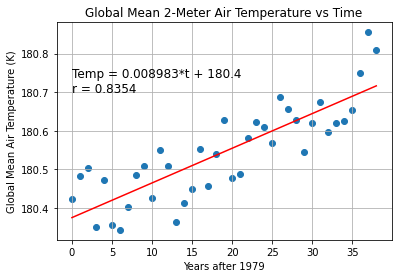

In [ ]:
# This script creates a scatter plot of the global mean air temperature by year

# Open the dataset file
f = nc.Dataset('/content/drive/Shared drives/Research Project Data/CSATS/t2m.daily_mean.1979-2017.nc', 'r')

# Make variables to store all the temperature and latitude values
temp = f.variables['t2m'][:]
lat = f.variables['latitude'][:]

# Calculate how many full years of data are in the dataset
numYears = temp.shape[0] // 365

# Create an array that stores a value for each year after 1979, with the year 1979 at index 0
years = np.arange(numYears)

# Create an array, with 0s as placeholders, that will be used to store the global mean air temperature of each year
yearlyGlobalMeanTemp = np.zeros(numYears)

# Loop through each year and calculate the global mean air temperature during that time
for i in range(numYears):
    # Decide how many days were in the current year (first year: 1979)
    numDaysInYear = 365
    if ((i - 1) % 4 == 0):
        numDaysInYear = 366
    
    # Store one year of temperature data
    oneYearTemp = temp[(i * numDaysInYear):(i * numDaysInYear + numDaysInYear), :, :]
    
    # Average the data at each location across all 12 months
    meanYearTemp = oneYearTemp.mean(axis=0)
    
    # Average the data all longitude coordinates
    meanYearLonTemp = meanYearTemp.mean(axis=1)
    
    # Weight the data depending on its latitude coordinates, with data from locations farther from the equator given less weight since it represents a smaller area
    for j in range(lat.shape[0]):
        meanYearLonTemp[j] *= np.cos(lat[j] * np.pi/180)
    
    # Average the data across all latitude coordinates
    yearlyGlobalMeanTemp[i] = meanYearLonTemp.mean(axis=0)

# Calculate the slope, y-intercept, and correlation coefficient of the best-fit line through the temperature-vs-time points
m, b = np.polyfit(years, yearlyGlobalMeanTemp, 1)
r = np.corrcoef(years, yearlyGlobalMeanTemp)[0,1]

# Create a scatter plot of the global mean ISR values over time, and then plot the best-fit line through the points
plt.scatter(years, yearlyGlobalMeanTemp)
plt.plot(years, m * years + b, color='red')

# Adjust the viewing window of the graph, and place a text box containing the equation of the best-fit line and value of the correlation coefficient.
#plt.axis([0, 20, 0, 400])
plt.text(0, 180.7, 'Temp = ' + f'{m:.4g}' + '*t + ' + f'{b:.4g}' + '\nr = ' + f'{r:.4g}', fontsize=12)

# Add a title and labels to the horizontal and vertical axes. Then adjust how many ticks are on the horizontal axis and add gridlines.
plt.title('Global Mean 2-Meter Air Temperature vs Time')
plt.xlabel('Years after 1979')
plt.ylabel('Global Mean Air Temperature (K)')
plt.grid()

# Save a PNG image of the graph
plt.savefig('/content/drive/My Drive/Research Project for CSATS/AirTemp-Year_Graph.png', bbox_inches='tight', dpi=200)